<a href="https://colab.research.google.com/github/tantiboro/vaki/blob/main/kiva_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Oct 27 14:07:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/New Folder/loans_lenders.csv')

In [ ]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/New Folder/loans.csv')

In [ ]:
# How many columns and rows are they in the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 2086700 rows and 34 columns.


In [ ]:
print(f'The columns of the dataset are: {df.columns.to_list()}')

The columns of the dataset are: ['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION', 'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS', 'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE', 'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID', 'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME', 'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES', 'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL']


In [ ]:
# How many NaN are in the dataframe
df.isnull().sum()

LOAN_ID                                  0
LOAN_NAME                            50238
ORIGINAL_LANGUAGE                    45891
DESCRIPTION                          45926
DESCRIPTION_TRANSLATED              455312
FUNDED_AMOUNT                            0
LOAN_AMOUNT                              0
STATUS                                   0
IMAGE_ID                             45891
VIDEO_ID                           2085522
ACTIVITY_NAME                            0
SECTOR_NAME                              0
LOAN_USE                             45914
COUNTRY_CODE                            34
COUNTRY_NAME                             0
TOWN_NAME                           176345
CURRENCY_POLICY                          0
CURRENCY_EXCHANGE_COVERAGE_RATE     473453
CURRENCY                                 0
PARTNER_ID                           21173
POSTED_TIME                              0
PLANNED_EXPIRATION_TIME             371834
DISBURSE_TIME                         4013
RAISED_TIME

In [ ]:
# Dropping columns with more than 100k missing values and only informative data
df1 = df.drop(columns = ['LOAN_ID', 'DESCRIPTION', 'COUNTRY_CODE','VIDEO_ID', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'TOWN_NAME', 'PLANNED_EXPIRATION_TIME', 'RAISED_TIME', 'TAGS', 'IMAGE_ID', 'PARTNER_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'BORROWER_NAMES', 'BORROWER_PICTURED', 'DISBURSE_TIME'], axis=1)

In [ ]:
df1.isnull().sum()

DESCRIPTION_TRANSLATED    455312
FUNDED_AMOUNT                  0
LOAN_AMOUNT                    0
STATUS                         0
ACTIVITY_NAME                  0
SECTOR_NAME                    0
LOAN_USE                   45914
COUNTRY_NAME                   0
CURRENCY_POLICY                0
CURRENCY                       0
POSTED_TIME                    0
LENDER_TERM                   24
NUM_LENDERS_TOTAL              0
NUM_JOURNAL_ENTRIES            0
NUM_BULK_ENTRIES               0
BORROWER_GENDERS           45891
REPAYMENT_INTERVAL             0
DISTRIBUTION_MODEL             0
dtype: int64

In [ ]:
df2 = df1.dropna()

In [ ]:
df2['STATUS'].value_counts()

funded         1537208
expired          86606
fundRaising       7564
Name: STATUS, dtype: int64

In [ ]:
print(f'The dataset has {df2.shape[0]} rows and {df2.shape[1]} columns.')

The dataset has 1631378 rows and 18 columns.


In [ ]:
df2.isnull().sum()

DESCRIPTION_TRANSLATED    0
FUNDED_AMOUNT             0
LOAN_AMOUNT               0
STATUS                    0
ACTIVITY_NAME             0
SECTOR_NAME               0
LOAN_USE                  0
COUNTRY_NAME              0
CURRENCY_POLICY           0
CURRENCY                  0
POSTED_TIME               0
LENDER_TERM               0
NUM_LENDERS_TOTAL         0
NUM_JOURNAL_ENTRIES       0
NUM_BULK_ENTRIES          0
BORROWER_GENDERS          0
REPAYMENT_INTERVAL        0
DISTRIBUTION_MODEL        0
dtype: int64

In [ ]:
#Check the status of all the loans
df2['STATUS'].value_counts()

funded         1537208
expired          86606
fundRaising       7564
Name: STATUS, dtype: int64

In [ ]:
# Drop the loans that are still on fundraising stage
data = df2.loc[df1['STATUS'] != 'fundRaising']
data.head(2)

,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_NAME,CURRENCY_POLICY,CURRENCY,POSTED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,BORROWER_GENDERS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
1,"Rosa works hard to support her family. Rosa is married and has a general store business in the Philippines.<br /><br />Rosa requested a PHP 5,000 loan through NWTF to buy more groceries to sell in her general store.<br /><br />Rosa has been in this business for 10 years now.<br /><br />Rosa would like to save enough to provide a secure future for her family.",125.0,125.0,funded,General Store,Retail,to buy more groceries to sell in her general store,Philippines,shared,PHP,2015-08-16 14:03:48.000 +0000,8.0,5,1,1,female,monthly,field_partner
2,"Warlita is a widowed woman with two children. She is a very hardworking entrepreneur. She is 54 years old and has one child currently in school.<br /><br />Warlita has a buy-and-sell banana business in the Philippines. She has requested a PHP 8,000 loan amount through NWTF to buy more bananas to sell and other supplies needed in her business. She has been in this business for three years. In the future, Warlita would like to save enough to provide a secure future for her family.",175.0,175.0,funded,Fruits & Vegetables,Food,to buy more bananas to sell and other supplies needed in her business.,Philippines,shared,PHP,2016-09-28 13:37:22.000 +0000,11.0,7,1,1,female,monthly,field_partner


In [ ]:
# Checking again the status of the remaining loans
data['STATUS'].value_counts()

funded     1537208
expired      86606
Name: STATUS, dtype: int64

In [ ]:
data.dtypes

DESCRIPTION_TRANSLATED     object
FUNDED_AMOUNT             float64
LOAN_AMOUNT               float64
STATUS                     object
ACTIVITY_NAME              object
SECTOR_NAME                object
LOAN_USE                   object
COUNTRY_NAME               object
CURRENCY_POLICY            object
CURRENCY                   object
POSTED_TIME                object
LENDER_TERM               float64
NUM_LENDERS_TOTAL           int64
NUM_JOURNAL_ENTRIES         int64
NUM_BULK_ENTRIES            int64
BORROWER_GENDERS           object
REPAYMENT_INTERVAL         object
DISTRIBUTION_MODEL         object
dtype: object

In [ ]:
data.columns = [i.replace(' ', '_').lower() for i in data.columns]

In [ ]:
print(f'The dataset has the following colums: {data.columns.to_list()}.')

The dataset has the following colums: ['description_translated', 'funded_amount', 'loan_amount', 'status', 'activity_name', 'sector_name', 'loan_use', 'country_name', 'currency_policy', 'currency', 'posted_time', 'lender_term', 'num_lenders_total', 'num_journal_entries', 'num_bulk_entries', 'borrower_genders', 'repayment_interval', 'distribution_model'].


In [ ]:
dat = data.copy()
dat['status'].value_counts()

funded     1537208
expired      86606
Name: status, dtype: int64

In [ ]:
dat.head(1)

,description_translated,funded_amount,loan_amount,status,activity_name,sector_name,loan_use,country_name,currency_policy,currency,posted_time,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,borrower_genders,repayment_interval,distribution_model
1,"Rosa works hard to support her family. Rosa is married and has a general store business in the Philippines.<br /><br />Rosa requested a PHP 5,000 loan through NWTF to buy more groceries to sell in her general store.<br /><br />Rosa has been in this business for 10 years now.<br /><br />Rosa would like to save enough to provide a secure future for her family.",125.0,125.0,funded,General Store,Retail,to buy more groceries to sell in her general store,Philippines,shared,PHP,2015-08-16 14:03:48.000 +0000,8.0,5,1,1,female,monthly,field_partner


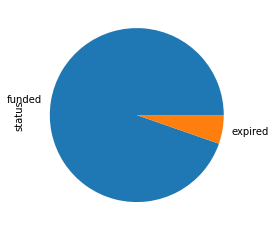

In [ ]:
dat['status'].value_counts().plot(kind='pie')

In [ ]:
dat['sector_name'].value_counts()

Agriculture       436580
Food              337445
Retail            300793
Services          104944
Housing            96275
Clothing           81678
Personal Use       73158
Education          65958
Arts               33399
Transportation     32955
Health             25978
Construction       17207
Manufacturing      14141
Entertainment       1839
Wholesale           1464
Name: sector_name, dtype: int64

In [ ]:
dat[['loan_amount', 'funded_amount', 'sector_name', 'status']].groupby(['sector_name', 'status']).count()

loan_amount  funded_amount
sector_name    status                             
Agriculture    expired        24015          24015
               funded        412565         412565
Arts           expired          273            273
               funded         33126          33126
Clothing       expired         5427           5427
               funded         76251          76251
Construction   expired          741            741
               funded         16466          16466
Education      expired          978            978
               funded         64980          64980
Entertainment  expired          171            171
               funded          1668           1668
Food           expired        15304          15304
               funded        322141         322141
Health         expired         1836           1836
               funded         24142          24142
Housing        expired         6077           6077
               funded         90198          90198
Manufacturing  expired           32             32
               funded         14109          14109
Personal Use   expired         2019           2019
               funded         71139          71139
Retail         expired        19139          19139
               funded        281654         281654
Services       expired         7019           7019
               funded         97925          97925
Transportation expired         3520           3520
               funded         29435          29435
Wholesale      expired           55             55
               funded          1409           1409

In [ ]:
dat.groupby('status').mean()

,funded_amount,loan_amount,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries
status,,,,,,
expired,587.280558,1419.374812,18.185437,15.439150,1.014064,1.000820
funded,796.813200,796.813346,12.980549,21.304216,1.504796,1.134655


In [ ]:
dat['loan_amount_higher'] = np.where(dat['funded_amount'] >= dat['loan_amount'], 
                                           'yes', 'no')
dat['loan_amount_higher'].value_counts()

yes    1537211
no       86603
Name: loan_amount_higher, dtype: int64

In [ ]:
learning_data = dat[['loan_amount', 'loan_use', 'sector_name', 'status']]
learning_data['status'] = dat.apply(lambda x: 1 if x.status == 'funded' else 0, axis=1)

learning_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,loan_amount,loan_use,sector_name,status
1,125.0,to buy more groceries to sell in her general store,Retail,1
2,175.0,to buy more bananas to sell and other supplies needed in her business.,Food,1
3,1400.0,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.",Agriculture,1
4,425.0,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc",Food,1
5,325.0,to buy fertilizers and seeds to get a good yield and grow his farming business.,Agriculture,1


In [ ]:
cat_data = dat[['sector_name']]
cat_data.nunique()

sector_name    15
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_data_1hot = cat_encoder.fit_transform(cat_data)
cat_data_1hot

<1623814x15 sparse matrix of type '<class 'numpy.float64'>'
	with 1623814 stored elements in Compressed Sparse Row format>

In [ ]:
cat_data_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df3 = pd.DataFrame(cat_data_1hot.toarray())
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
dtype: object

In [ ]:
newdf = pd.concat([learning_data[['loan_amount', 'status']].reset_index(drop=True), df3], axis=1)
newdf.head()

,loan_amount,status,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,125.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,175.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1400.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,425.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,325.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target = newdf['status']
data_features = newdf.drop('status', axis=1)

In [ ]:
#Explore RandomForestClassifier on a holdout set

In [ ]:
#import the methods that will be needed to evaluate a basic model
#import Random Forest for Classification from sklearn
#Split the data into training and test set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
X_train, X_test, y_train, y_test = train_test_split(data_features, target, test_size=0.3)

In [ ]:
# Fit a basic Random Forest model
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [ ]:
# Make prediction on the test set using the fit model
y_pred = rf_model.predict(X_test)

In [ ]:
# Evalute model predictions using precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {}'.format(round(precision, 3), round(recall, 3)))

Precision: 0.947 / Recall: 1.0


In [ ]:
import joblib
# save
joblib.dump(rf, "my_random_forest.joblib")

# load
#loaded_rf = joblib.load("my_random_forest.joblib")

['my_random_forest.joblib']

In [ ]:
from sklearn.preprocessing import StandardScaler
#Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9464593474441548
Testing Data Score: 0.9462357203707316


 Hyperparameter Tuning

Use GridSerachCV to tune the model's parameters

In [ ]:
 from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l1 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l2 .................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................... C=1, penalty=l2, score=0.946, total=  12.2s
[CV] C=1, penalty=l2 .................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................... C=1, penalty=l2, score=0.946, total=  11.5s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.947, total=   9.5s
[CV] C=1, penalty=l2 .................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................... C=1, penalty=l2, score=0.946, total=  12.1s
[CV] C=1, penalty=l2 .................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ..................... C=1, penalty=l2, score=0.946, total=  12.3s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l2 .................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................... C=5, penalty=l2, score=0.946, total=  12.3s
[CV] C=5, penalty=l2 .................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................... C=5, penalty=l2, score=0.946, total=  12.2s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.947, total=  12.1s
[CV] C=5, penalty=l2 .................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................... C=5, penalty=l2, score=0.946, total=  11.8s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.946, total=   8.8s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.946, total=   7.4s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.946, total=  10.0s
[CV] C=10, penalty=l2 ................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................... C=10, penalty=l2, score=0.947, total=  12.5s
[CV] C=10, penalty=l2 ................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................... C=10, penalty=l2, score=0.946, total=  11.7s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.946, total=   9.2s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2'}
0.9464831010384716


Save the Model

In [ ]:
# save fitted model to file
import joblib
filename = 'logistic.sav'
joblib.dump(grid, filename)

['logistic.sav']

In [ ]:
#transform the training and testing data using the X_scaler and y_scaler

In [ ]:
loan_data = learning_data.dropna()
loan_data.isnull().sum()

loan_amount    0
loan_use       0
sector_name    0
status         0
dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)
loan_data[loan_data['loan_use'].apply(lambda x: x.isascii())]

,loan_amount,loan_use,sector_name,status
1,125.0,to buy more groceries to sell in her general store,Retail,1
2,175.0,to buy more bananas to sell and other supplies needed in her business.,Food,1
3,1400.0,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.",Agriculture,1
4,425.0,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc",Food,1
5,325.0,to buy fertilizers and seeds to get a good yield and grow his farming business.,Agriculture,1
...,...,...,...,...
2086695,600.0,to process more mobile airtime credit transactions on weekends.,Retail,0
2086696,100.0,"to access premium seeds and high quality fertilizer for 0.5 acres of maize, in addition to advice and insurance, optimizing for increased productivity and profits",Agriculture,1
2086697,500.0,"to cultivate her 2.1 hectares of beans and 0.7 hectares of corn, and purchase the necessary inputs.",Agriculture,1
2086698,1350.0,to purchase a solar light and gain access to cost efficient hybrid seeds and fertilizer for maize cultivation.\t\t\t\t\t\t\t,Agriculture,1


In [ ]:
loan_data.head()

,loan_amount,loan_use,sector_name,status
1,125.0,to buy more groceries to sell in her general store,Retail,1
2,175.0,to buy more bananas to sell and other supplies needed in her business.,Food,1
3,1400.0,"to buy more taro roots (seedlings), more banana tubers (seedlings), chemicals, a backpack sprayer, a wheelbarrow, a chainsaw, and a rake.",Agriculture,1
4,425.0,"to increase her stock of various brands of beer: 33 Export, Mutzig, Amstel, etc",Food,1
5,325.0,to buy fertilizers and seeds to get a good yield and grow his farming business.,Agriculture,1


In [ ]:
loan_data.tail()

,loan_amount,loan_use,sector_name,status
2086695,600.0,to process more mobile airtime credit transactions on weekends.,Retail,0
2086696,100.0,"to access premium seeds and high quality fertilizer for 0.5 acres of maize, in addition to advice and insurance, optimizing for increased productivity and profits",Agriculture,1
2086697,500.0,"to cultivate her 2.1 hectares of beans and 0.7 hectares of corn, and purchase the necessary inputs.",Agriculture,1
2086698,1350.0,to purchase a solar light and gain access to cost efficient hybrid seeds and fertilizer for maize cultivation.\t\t\t\t\t\t\t,Agriculture,1
2086699,5000.0,fill our showroom with great buys that incoming college kids will love to purchase.,Retail,0


RNN:Implement a basic RNN

Read in, Clean and split the data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

In [ ]:
#Read the data in
data_df = learning_data.drop(columns=['sector_name'])
features = data_df['loan_use']
labels = data_df['status']

In [ ]:
#Spliting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [ ]:
# Install Keras
!pip install -U keras

In [ ]:
# Import the tools needed for keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using Tensorflow backend

In [ ]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
#Use that tokenizer to transform the data in the training 
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_seq[0]

[1, 3, 21, 1, 9, 26, 39, 27, 70, 53, 20, 31, 1, 9, 12, 5, 538, 538, 40]

In [ ]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [ ]:
X_train_seq_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   3,  21,   1,   9,  26,  39,  27,
        70,  53,  20,  31,   1,   9,  12,   5, 538, 538,  40], dtype=int32)

Building the model


In [ ]:
# Import the tools needed for keras and define the functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  recall = true_positives / (predicted_positives + K.epsilon())
  return recall


In [ ]:
#Construct a RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          1095296   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,104,705
Trainable params: 1,104,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [ ]:
history = model.fit(X_train_seq_padded, y_train,
                    batch_size=32, epochs=5,
                    validation_data=(X_test_seq_padded, y_test)) 

Epoch 1/5
35521/35521 [==============================] - 195s 5ms/step - loss: 0.1853 - accuracy: 0.9465 - precision_m: 0.9465 - recall_m: 1.0000 - val_loss: 0.1804 - val_accuracy: 0.9470 - val_precision_m: 0.9470 - val_recall_m: 1.0000
Epoch 2/5
35521/35521 [==============================] - 190s 5ms/step - loss: 0.1786 - accuracy: 0.9465 - precision_m: 0.9466 - recall_m: 0.9999 - val_loss: 0.1794 - val_accuracy: 0.9470 - val_precision_m: 0.9470 - val_recall_m: 1.0000
Epoch 3/5
35521/35521 [==============================] - 191s 5ms/step - loss: 0.1754 - accuracy: 0.9468 - precision_m: 0.9475 - recall_m: 0.9991 - val_loss: 0.1792 - val_accuracy: 0.9467 - val_precision_m: 0.9477 - val_recall_m: 0.9988
Epoch 4/5
35521/35521 [==============================] - 190s 5ms/step - loss: 0.1724 - accuracy: 0.9478 - precision_m: 0.9488 - recall_m: 0.9987 - val_loss: 0.1799 - val_accuracy: 0.9464 - val_precision_m: 0.9475 - val_recall_m: 0.9986
Epoch 5/5
35521/35521 [=============================

Clean up text


Lemmatize text

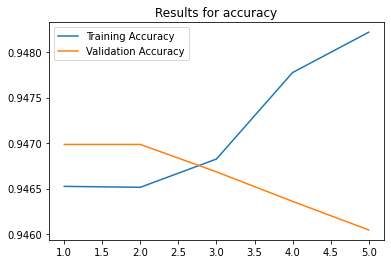

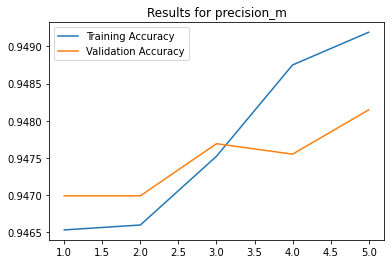

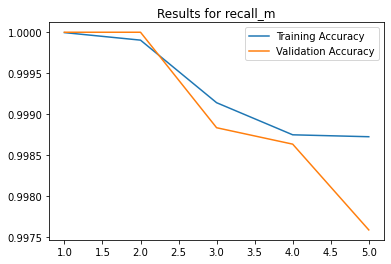

In [ ]:
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

In [ ]:
loan_data_cat = loan_data[['sector_name']]
loan_data_cat.nunique()

sector_name    15
dtype: int64

# New Section

In [ ]:
# Create a new column to calculate the average contribution by lenders
dat['contrib_per_lend'] = data['funded_amount'] / data['num_lenders_total']
dat['contrib_per_lend'].value_counts()

25.000000    302126
33.333333     49133
37.500000     35945
50.000000     35508
31.250000     35149
              ...  
74.788136         1
59.548611         1
68.684211         1
26.101695         1
43.842365         1
Name: contrib_per_lend, Length: 19326, dtype: int64

In [ ]:
#Create a new column for the average monthly repayment
dat['monthly_repayment'] = data['funded_amount'] / data['lender_term']
dat['monthly_repayment'].value_counts()

25.000000      69627
50.000000      36566
21.428571      35766
35.714286      35570
28.571429      31103
               ...  
296.666667         1
2191.666667        1
123.500000         1
23.546512          1
181.578947         1
Name: monthly_repayment, Length: 6981, dtype: int64

In [1]:
#Dropping the columns that are not necessary for the model
#data_reduced = dat.drop(columns=['loan_id', 'country_code', 'image_id', 'video_id', 'num_lenders_total', 'description_translated'])

In [ ]:
data_reduced.describe(include=object)

In [ ]:
data_reduced.describe()

In [ ]:
# import seaborn as sns
# sns.pairplot(df1[['contrib_per_lend', 'repayment_monthly']])

In [ ]:
data_reduced.columns

In [ ]:
#data_reduced.columns = [i.replace(' ', '_').lower() for i in df1.columns]

In [ ]:
data_reduced.isnull().sum()

In [ ]:
data_reduced.loan_amount.value_counts()

In [ ]:
data_reduced.funded_amount.value_counts()

In [ ]:
data_reduced['status'].value_counts()

In [ ]:
data_reduced.info()

In [ ]:
data_reduced.repayment_interval.value_counts()

In [ ]:
data_reduced.lender_term.value_counts()

In [ ]:
d = data_reduced['loan_name'].value_counts()[0:20]
d.plot(kind='bar')

In [ ]:
#Create a new column that shows the repayment status( 1 = irregular payment and 0 = payment on time)
data_reduced['repayment_status'] = data_reduced.apply(lambda x: 1 if x['repayment_interval'] =='irregular' else 0, axis=1)

In [ ]:
data_reduced['repayment_status'].value_counts().plot(kind='pie')

In [ ]:
data_reduced.info()

In [ ]:
data_clean = data_reduced[['loan_name', 'funded_amount','loan_amount','currency_exchange_coverage_rate', 'partner_id','lender_term', 'num_journal_entries', 'num_bulk_entries', 'contrib_per_lend','monthly_repayment', 'repayment_status']]


In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/New Folder/lenders.csv')
df2.head()

In [ ]:
df2.isnull().sum()

In [ ]:
df2.info()

In [ ]:
df1['SECTOR_NAME'].value_counts()